In [1]:
# k-Fold Cross Validation

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_table('data.txt')
X = dataset.values[:,:3]
r_y = dataset.values[:,3]
y = [1.0 if i == 1 else 0.0 for i in r_y]
y = np.array(y)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Oversampling
#ros = RandomOverSampler()
#X, y = ros.fit_sample(X, y)


In [ ]:
import time
import sys

def display_time(seconds, granularity=2):
    result = []
    intervals = (
    ('semanas', 604800),  # 60 * 60 * 24 * 7
    ('dias', 86400),    # 60 * 60 * 24
    ('horas', 3600),    # 60 * 60
    ('minutos', 60),
    ('segundos', 1),
    )

    for name, count in intervals:
        value = seconds // count
        if value:
            seconds -= value * count
            if value == 1:
                name = name.rstrip('s')
            result.append("{} {}".format(value, name))
    return ', '.join(result[:granularity])

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score

# Applying k-Fold Cross Validation
#from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut

# regularization
reg = np.linspace(0.00000001, 10000000000.0, num=50)

total_tasks = 50
tasks_count = 0
last_time = 0
start_time = time.time()

reg_accuracies = []
reg_log_losses = []
reg_mse = []
reg_precision_1 = []
reg_precision_0 = []

for r in range(len(reg)):
    # Logistic Regression
    accuracies = []
    log_losses = []
    mse = []
    precision_1 = []
    precision_0 = []

    for i in range(10):
        skf = StratifiedKFold(n_splits = 10, shuffle=True)
        for train, test in skf.split(X, y):
            X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
            #c_reg = 1/reg[r]
            classifier = LogisticRegression(C = reg[r])
            #classifier = MLPClassifier(hidden_layer_sizes=(5,), alpha=reg[r])
            classifier.fit(X_train, y_train)
            y_pred = classifier.predict(X_test)
            y_prob = classifier.predict_proba(X_test)
            accuracies.append(accuracy_score(y_test, y_pred))
            precision_1.append(precision_score(y_test, y_pred, pos_label=1))
            precision_0.append(precision_score(y_test, y_pred, pos_label=0))
            log_losses.append(log_loss(y_test, y_prob))
            mse.append(mean_squared_error(y_test, y_prob[:, 1]))

    reg_accuracies.append((np.array(accuracies)).mean())
    reg_precision_1.append((np.array(precision_1)).mean())
    reg_precision_0.append((np.array(precision_0)).mean())
    reg_log_losses.append((np.array(log_losses)).mean())
    reg_mse.append((np.array(mse)).mean())
    
    tasks_count += 1
    last_time = time.time()
    exec_time = last_time - start_time
    remaining_time = (total_tasks - tasks_count) * (exec_time) / tasks_count
    sys.stdout.write("\rCalculado ... %.2f%%. Tempo execução: %s. Tempo restante estimado: %s" % (((100.0 * tasks_count / total_tasks)), display_time(last_time - start_time), display_time(remaining_time)))
    sys.stdout.flush()


Calculado ... 56.00%. Tempo execução: 37.0 segundos. Tempo restante estimado: 29.0 segundos

In [3]:
reg_log_losses

[0.6866413703663008,
 0.5064788091285799,
 0.50094199429720232,
 0.50073694361603449,
 0.49996211162964571,
 0.49964801308408885,
 0.49974843186917739,
 0.49947793080180708,
 0.5002758915519594,
 0.4995309852140582,
 0.49939179766752623,
 0.49966697864284093,
 0.49948215784154215,
 0.49936244243664019,
 0.49959221188249459,
 0.49920417666548766,
 0.49966769316698839,
 0.49888985204474856,
 0.49974276060594286,
 0.49901468823452161,
 0.49956385088413763,
 0.50020525634171031,
 0.499378350088301,
 0.49985677638499743,
 0.4997367020772211,
 0.49935710678918127,
 0.4992806454722315,
 0.49924625719432414,
 0.49981190045506863,
 0.4996769243686694,
 0.49995087382791098,
 0.49947412284767512,
 0.49980575405849387,
 0.49997774523478022,
 0.49987743053398392,
 0.49958990206412629,
 0.4995947594472645,
 0.49931097285500475,
 0.49917058979239498,
 0.49946392737580653,
 0.49992281203049133,
 0.50029699773621283,
 0.49973483108426064,
 0.49984059335532344,
 0.49940659753987987,
 0.4996748111806123,

/home/rodrigo/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


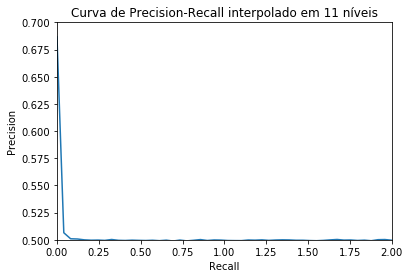

In [5]:
rec_x = np.arange(0, 1.1, 0.1)

plt.plot(reg, reg_log_losses)

plt.xlim([0.0, 2.0])
plt.ylim([0.5, 0.7])
plt.xlabel('alpha')
plt.ylabel('Precision')
plt.title("Curva de Precision-Recall interpolado em 11 níveis")
plt.legend(loc='upper right')
plt.show()